# **Backpropagation from Scratch**

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Derivation is at the heart of backpropagation
Derivation helps us undrstand how a function behaves if the input is modified.Given a function f(x), how does the function behave if input x is modified with h i.e x+h.

In case of backpropagation, the inputs are weights and biases. We want to understand what happens if small changes(h) are made to x(weights and biases)

### Now lets take a simple equation f(x) to understand how the function behaviour changes upon increasing it with a small value

In [16]:
def f(x):
  # return 3*x**2 - 4*x + 5
  return 4*x**2 - 5*x + 6

In [17]:
f(3.0)

27.0

In [18]:
xs = np.arange(-5, 5, 0.5)
ys = f(xs)
ys

array([131. , 109.5,  90. ,  72.5,  57. ,  43.5,  32. ,  22.5,  15. ,
         9.5,   6. ,   4.5,   5. ,   7.5,  12. ,  18.5,  27. ,  37.5,
        50. ,  64.5])

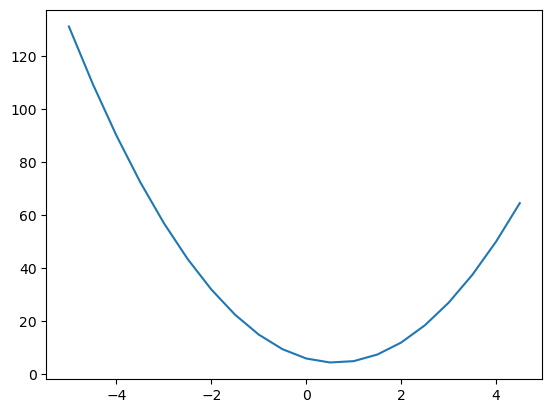

In [19]:
plt.plot(xs, ys)

In [20]:
x = 3.0

# to get a more accurate slope, coverge h towards 0
h = 0.00001
f(x+h)

27.000190000399996

Now lets get the slope(f(x+h)-f(x))/h

In [21]:
(f(x+h)-f(x))/h

19.000039999639284

### one more example, a bit more complex

In [22]:
a = 2.0
b = -3.0
c = 10.0

# equation
d = a*b + c

print(d)

4.0


In [23]:
# observe the values when a is increased

def f1(a, b, c):
  return a*b + c

h = 0.00001

a = 2.0
b = -3.0
c = 10.0

d1 = f1(a, b, c)
d2 = f1(a+h, b, c)

# slope when a is increased by h
print("slope when a is increased: ",(d2-d1)/h)

d2 = f1(a, b+h, c)
# slope when b is increased by h
print("slope when b is increased: ",(d2-d1)/h)

d2 = f1(a, b, c+h)
# slope when c is increased by h
print("slope when c is increased: ",(d2-d1)/h)

slope when a is increased:  -3.000000000064062
slope when b is increased:  2.0000000000131024
slope when c is increased:  0.9999999999621422


### Neural Networks have massive expressions so lets start with creating a data structure to maintain these expressions

In [35]:
class Operand:
    def __init__(self, value, _children = (), _operation='', _label = ''):
        self.value = value
        self._prev_ops = set(_children)
        self._operation = _operation
        self._label = _label
    
    def __repr__(self):
        return f"Variable(value={self.value})"

    # adding two operands
    def __add__(self, other):
        addition = Operand(self.value + other.value, (self, other), '+')
        return addition

    # subtracting two operands

    # multiplying two operands
    def __mul__(self, other):
        product = Operand(self.value * other.value, (self, other), '*')
        return product

    # dividing two operands


In [62]:
a = Operand(2.0, _label='a')
b = Operand(3.0, _label='b')
c = Operand(4.0, _label='c')
d = a*b
d._label = 'd'
e = d + c
e._label='e'
f = Operand(-4.0, _label='f')
L = e + f; L._label='L'
L
# e, e._prev_ops, e._operation

Variable(value=6.0)

In [26]:
from graphviz import Digraph
# https://stackoverflow.com/questions/46182603/graphviz-not-running-in-jupyter-notebook-python-3-6

In [56]:
def trace(root):
    nodes = set()
    edges = set()
    def build_graph(node):
        if node not in nodes:
            nodes.add(node)
            for child in node._prev_ops:
                edges.add((child, node))
                build_graph(child)
    build_graph(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    nodes, edges = trace(root)
    for node in nodes:
        nid = str(id(node))
        dot.node(name=nid, label = "{%s | value %.4f }" % ( node._label, node.value), shape='record')
        if node._operation:
            dot.node(name=nid + node._operation, label=node._operation)
            dot.edge(nid + node._operation, nid)
    
    for e1, e2 in edges:
        dot.edge(str(id(e1)), str(id(e2)) + e2._operation)
    
    return dot

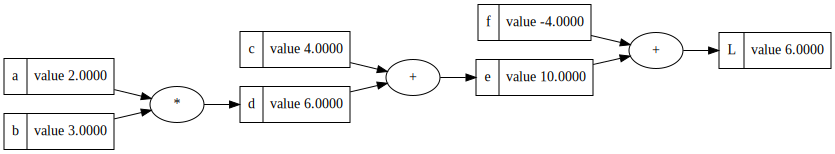

In [63]:
draw_dot(L)

 __Reference: [Neural Networks: Zero to Hero by **Anderj Karpathy**](https://youtu.be/VMj-3S1tku0?si=nt0sYb9Rs2g4qApr)__